<a href="https://colab.research.google.com/github/senumakant/ML-Project/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

The goal of this project is to develop a machine learning model to predict house prices based on various features that influence property value. The dataset contains information such as the size of the house, number of bedrooms, location, age, and other relevant attributes. The model should accurately estimate the price of a house given its features, enabling better decision-making for buyers, sellers, and real estate agents.

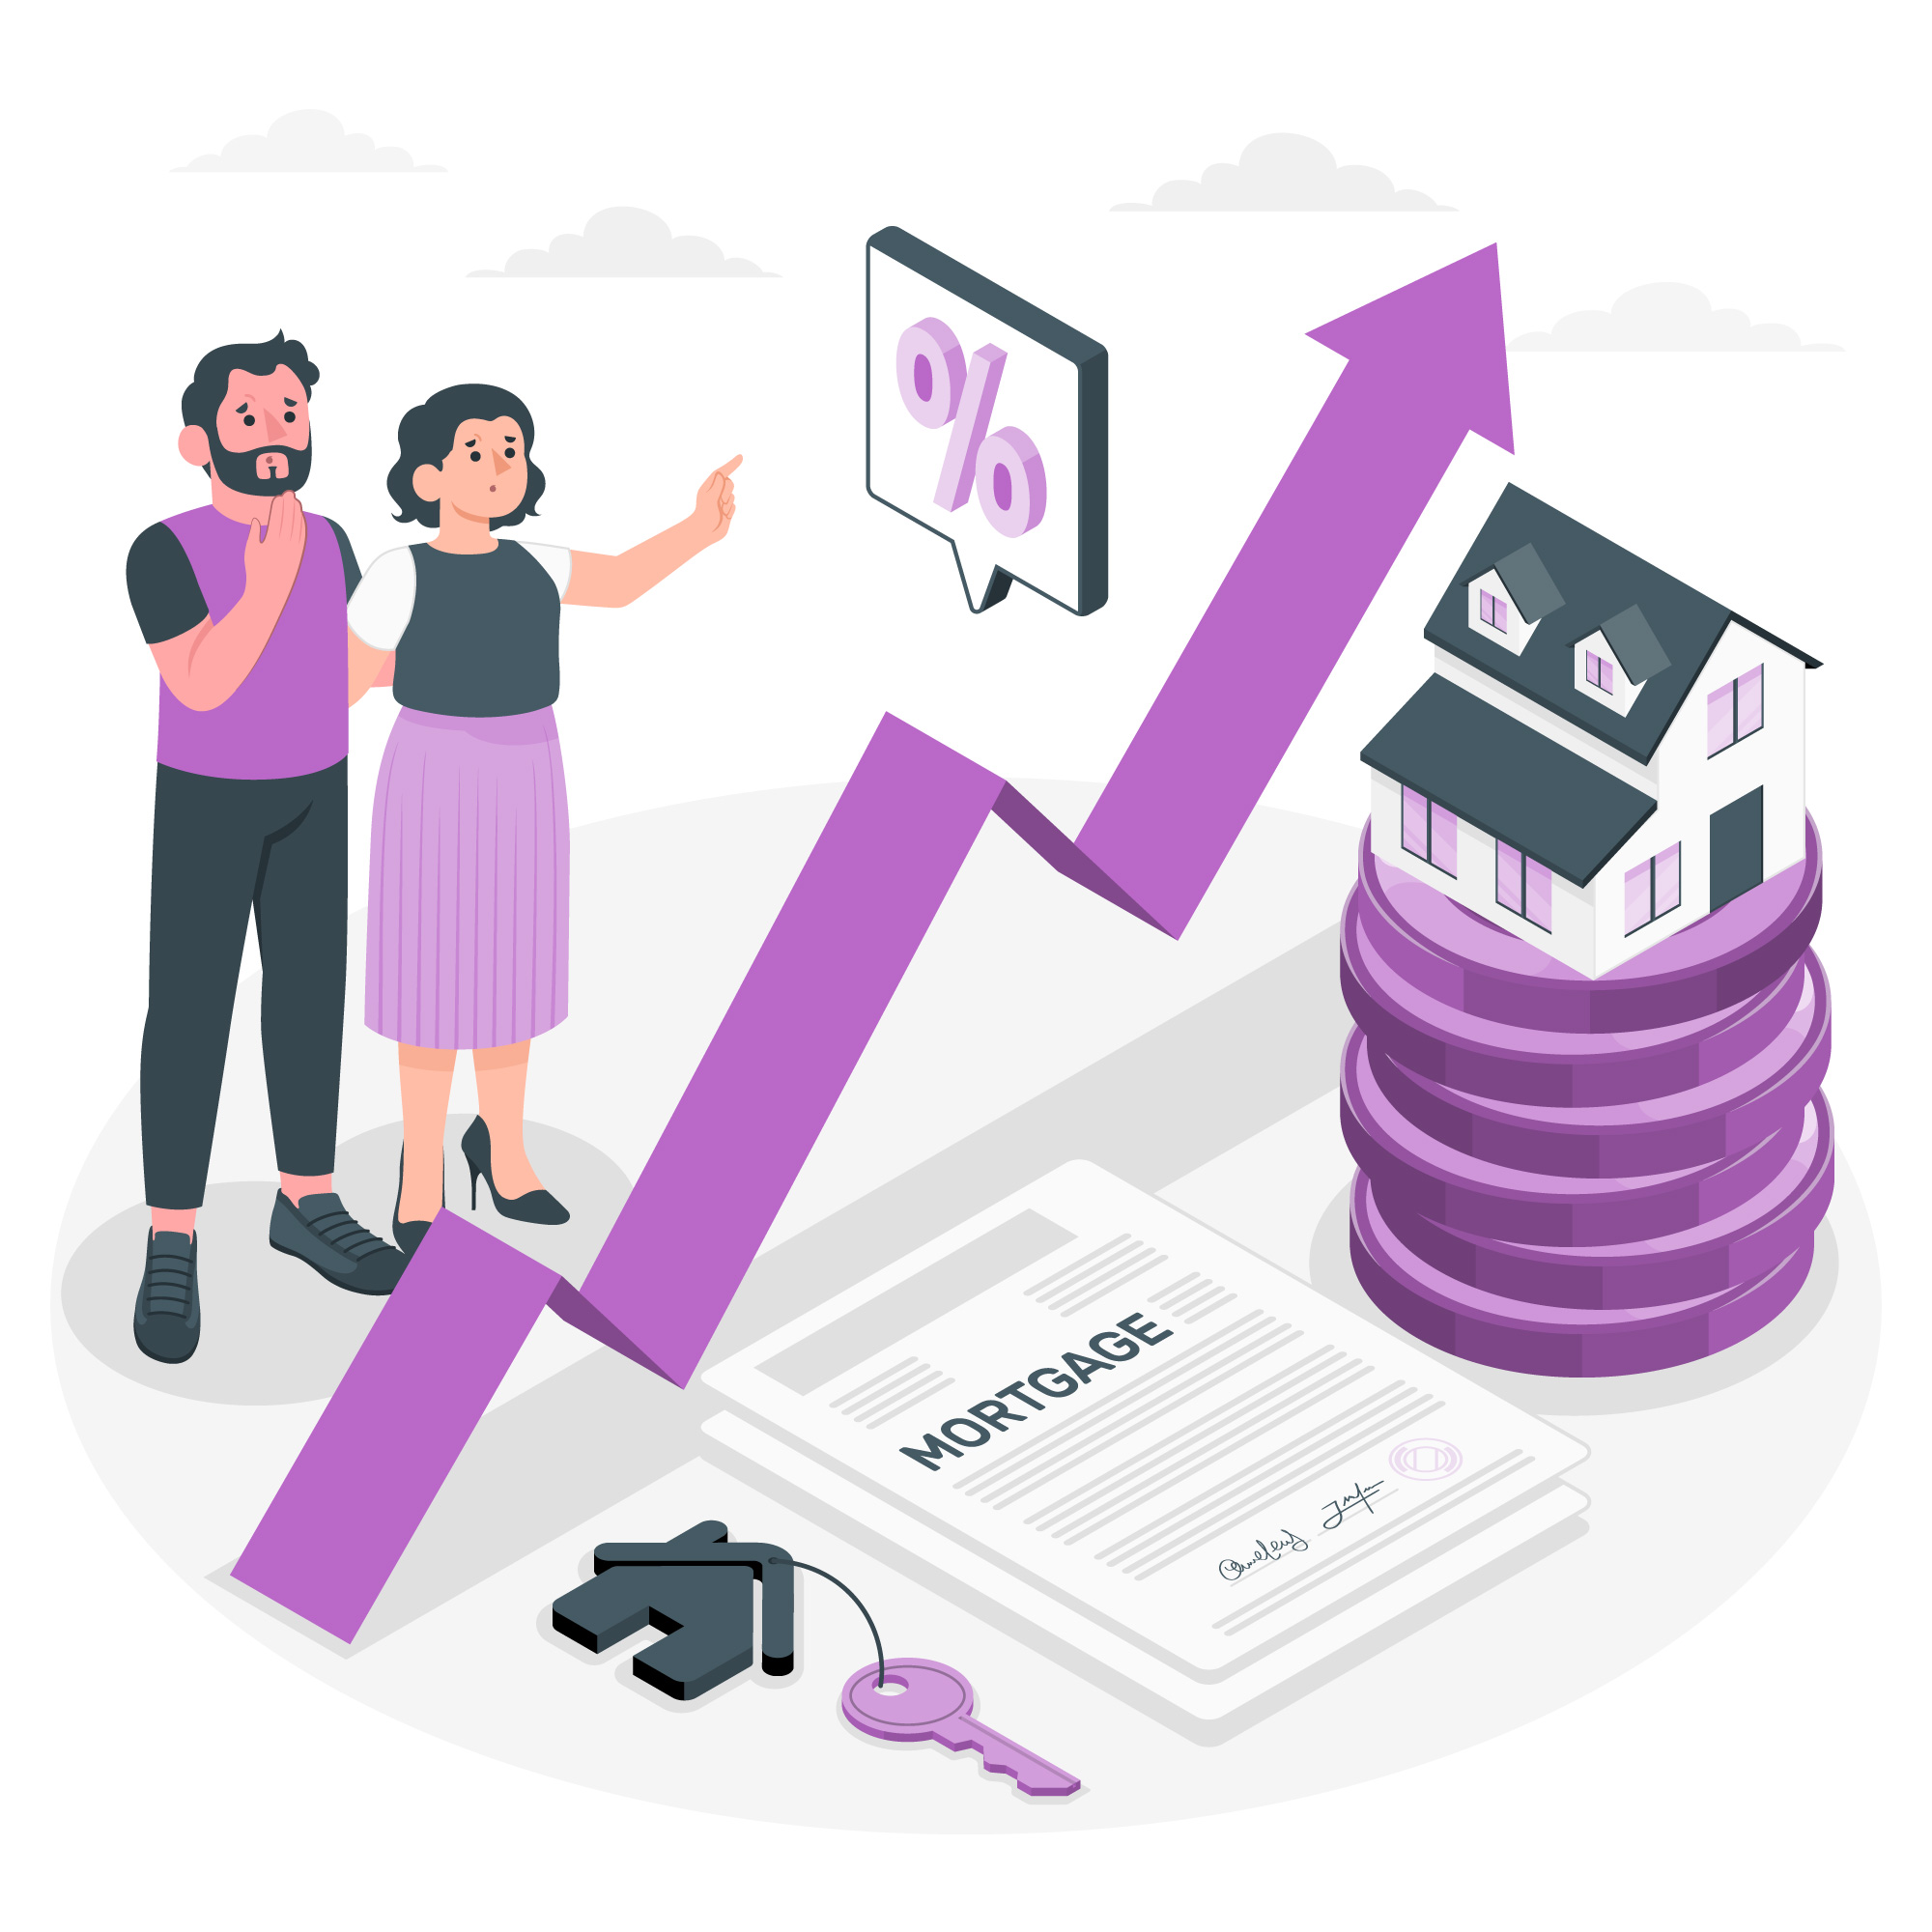

In [47]:
# Important Libraries
import numpy as np
import pandas as pd
import sklearn.datasets

**Importing the Boston House Price Dataset**

In [48]:
hp_dataset = sklearn.datasets.fetch_california_housing()

In [49]:
print(hp_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [50]:
# Loading the dataset to a pandas dataframe
hp_dataframe = pd.DataFrame(hp_dataset.data, columns = hp_dataset.feature_names)

In [51]:
hp_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [52]:
# add the target column to the dataframe
hp_dataframe['price'] = hp_dataset.target

In [53]:
hp_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Data Analysis**

In [54]:
# checking the number of rows and columns in the dataframe
hp_dataframe.shape

(20640, 9)

In [55]:
hp_dataframe.size

185760

In [56]:
# statistical measures of the dataset
hp_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Information of Dataframe**

This code provides a summary of a Pandas DataFrame named 'hp_dataframe'.

In [57]:
hp_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Checking for NaN values**

This code checks for any NaN (missing values) values in the DataFrame 'hp_dataframe' and sums up the count of NaN values in each column. Here's what it means:

In [58]:
hp_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [59]:
# statistical measures of the dataset
hp_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Visualizes the correlation**

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
corr=hp_dataframe.corr()

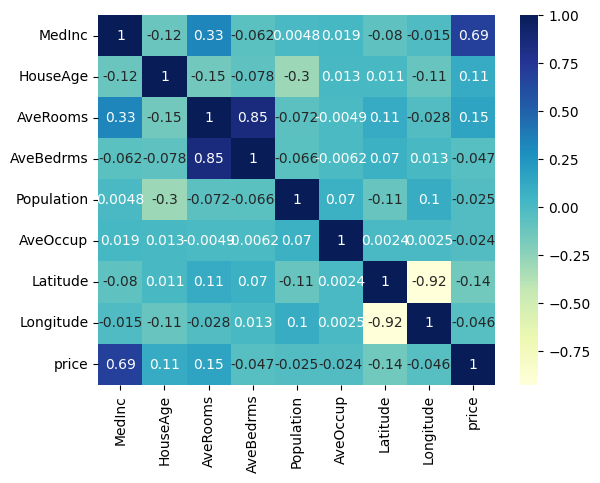

In [62]:
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

# **Data Splitting**

In [63]:
X = hp_dataframe.drop(['price'], axis=1)
Y = hp_dataframe['price']

In [64]:
print(X,Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

**Splitting the data into training data and test data**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [68]:
Y_train

,price
2072,0.720
10600,2.741
2494,0.583
4284,2.000
16541,1.179
...,...
1099,0.938
18898,1.031
11798,1.926
6637,1.535


# **Create and train the model**

In [99]:
from xgboost import XGBRegressor

In [100]:
# load the model
model = XGBRegressor()


In [102]:
# Required imports
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Assuming house_price_dataframe is already loaded and preprocessed
X = hp_dataframe.drop(['price'], axis=1)  # Features
Y = hp_dataframe['price']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize the model
model = XGBRegressor()

# Training the model
try:
    model.fit(X_train, Y_train)
    print("Model trained successfully!")
except Exception as e:
    print(f"Error during model training: {e}")

Model trained successfully!


# **Evaluate the model**

In [103]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [104]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [106]:
from sklearn import metrics

In [107]:
# R Squared
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Squared :', score_1)
print('Mean Absolute Error:', score_2)

R Squared : 0.943650140819218
Mean Absolute Error: 0.1933648700612105


# **Result**

**Visualize the actuale prices and predicted prices**

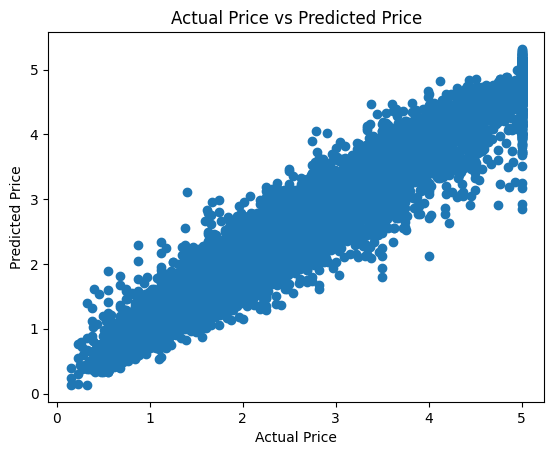

In [109]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

**Prediction on test data**

In [113]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [114]:
# R Squared
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Squared :', score_1)
print('Mean Absolute Error:', score_2)

R Squared : 0.8338000331788725
Mean Absolute Error: 0.3108631800268186


In [117]:
# Function to take user input and predict house price
def predict_house_price():
    print("Enter the following details for prediction:")
    MedInc = float(input("Median Income in block group: "))
    HouseAge = float(input("Median House Age in block group: "))
    AveRooms = float(input("Average number of rooms per household: "))
    AveBedrms = float(input("Average number of bedrooms per household: "))
    Population = float(input("Block group population: "))
    AveOccup = float(input("Average number of household members: "))
    Latitude = float(input("Block group latitude: "))
    Longitude = float(input("Block group longitude: "))

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'MedInc': [MedInc],
        'HouseAge': [HouseAge],
        'AveRooms': [AveRooms],
        'AveBedrms': [AveBedrms],
        'Population': [Population],
        'AveOccup': [AveOccup],
        'Latitude': [Latitude],
        'Longitude': [Longitude]
    })

    # Predict the price
    predicted_price = model.predict(input_data)
    print("\
Predicted House Price: ", predicted_price[0])

# Call the function to take input and predict
predict_house_price()

Enter the following details for prediction:
Median Income in block group: 60
Median House Age in block group: 2022
Average number of rooms per household: 66146
Average number of bedrooms per household: 56234
Block group population: 54357
Average number of household members: 54321
Block group latitude: 4563
Block group longitude: 3244
Predicted House Price:  2.3036122
